**Name: Ananya Godse SAP ID: 60009220161 Batch: D1-1**

### Water Jug Problem

We have 3 jugs - A, B & C, each with a capacity of 8L, 5L & 3L, respectively. Initially, jug A (8L) is full and jug B & C are empty. Our goal is to have a jug with 4L of water in it.

Start State - (8, 0, 0)

Goal State - (1, 4, 3)

In [1]:
from collections import deque

**Function to check if a state has already been visited:**

In [2]:
def is_visited(state, visited):
    if state in visited:
        return True
    else:
        return False


**Function to add a state to the queue:**

In [3]:
def enqueue(state, parent, queue, visited):
    if not is_visited(state, visited):
        queue.append((state, parent))
        visited.add(state)


**Function to find all possible states from a given state:**

In [4]:
def move_gen(state, capacities):
    next_states = []
    a, b, c = state
    cap_a, cap_b, cap_c = capacities

    # pour water from jug A to jug B
    a_to_b = min(a, cap_b - b)
    next_states.append((a - a_to_b, b + a_to_b, c))

    # pour water from jug A to jug C
    a_to_c = min(a, cap_c - c)
    next_states.append((a - a_to_c, b, c + a_to_c))

    # pour water from jug B to jug A
    b_to_a = min(b, cap_a - a)
    next_states.append((a + b_to_a, b - b_to_a, c))

    # pour water from jug B to jug C
    b_to_c = min(b, cap_c - c)
    next_states.append((a, b - b_to_c, c + b_to_c))

    # pour water from jug C to jug A
    c_to_a = min(c, cap_c - a)
    next_states.append((a + c_to_a, b, c - c_to_a))

    # pour water from jug C to jug B
    c_to_b = min(c, cap_b - b)
    next_states.append((a, b + c_to_b, c - c_to_b))

    return next_states



**Function to test if the current state is the goal state:**

In [5]:
def goal_test(state, goal_state):
    return state == goal_state


**Function to perform the Breadth-First Search:**

In [6]:
def bfs(start_state, goal_state, capacities):
    queue = deque([(start_state, None)])  
    visited = set()  
    visited.add(start_state)

    parent_mapping = {start_state: None} 

    while queue:
        current_state, parent = queue.popleft()

        if goal_test(current_state, goal_state):
            path = []
            while current_state:
                path.append(current_state)
                current_state = parent_mapping[current_state]
            return path[::-1]

        next_states = move_gen(current_state, capacities)
        for next_state in next_states:
            if not is_visited(next_state, visited):
                parent_mapping[next_state] = current_state
                enqueue(next_state, current_state, queue, visited)
    return



**Function to print the solution path:**

In [7]:
def print_solution(solution_path):
    if solution_path:
        print("Solution Path:")
        for state in solution_path:
            print(state)
    else:
        print("No solution.")


In [8]:
capacities = (8, 5, 3)
start_state = (8, 0, 0)
goal_state = (1, 4, 3)

In [9]:
solution_path = bfs(start_state, goal_state, capacities)
print_solution(solution_path)

Solution Path:
(8, 0, 0)
(5, 0, 3)
(5, 3, 0)
(3, 3, 2)
(1, 5, 2)
(1, 4, 3)


### 8 - Puzzle Problem

A 3x3 board has tiles numbered from 0 to 8 with O representing an empty space. The goal is to arrange the board according to the goal state given below, by shifting the tiles around. 

Start State = [[6, 0, 2],
               [1, 8, 4],
               [7, 3, 5]]
               
Goal State = [[1, 2, 3],
              [8, 0, 4],
              [7, 6, 5]]

**Function to find the position of the empty space (0):**

In [10]:
def find_empty_space(state):
    for i in range(3):
        for j in range(3):
            if state[i][j] == 0:
                return i, j


**Function to swap a tile with the empty space:**

In [11]:
def swap(state, x1, y1, x2, y2):
    new_state = [row[:] for row in state]  
    new_state[x1][y1], new_state[x2][y2] = new_state[x2][y2], new_state[x1][y1]
    return new_state


**Function to generate all possible next states from the current state:**

In [12]:
def move_gen(state):
    next_states = []
    x, y = find_empty_space(state) 

    # possible moves: up, down, left, right
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for move in moves:
        new_x, new_y  = x + move[0], y + move[1]
        if 0 <= new_x < 3 and 0 <= new_y < 3:
            next_state = swap(state, x, y, new_x, new_y)
            next_states.append(next_state)

    return next_states


**Function to check if the current state is the goal state:**

In [13]:
def goal_test(state, goal_state):
    return state == goal_state


**Function to perform the Breadth-First Search:**

In [14]:
def bfs(start_state, goal_state):
    queue = deque([(start_state, None)]) 
    visited = set()  
    visited.add(tuple(map(tuple, start_state)))  

    parent_mapping = {tuple(map(tuple, start_state)): None} 

    while queue:
        current_state, parent = queue.popleft()

        if goal_test(current_state, goal_state):
            path = []
            while current_state:
                path.append(current_state)
                current_state = parent_mapping[tuple(map(tuple, current_state))]
            return path[::-1]

        next_states = move_gen(current_state)
        for next_state in next_states:
            state_tuple = tuple(map(tuple, next_state))
            if state_tuple not in visited:
                parent_mapping[state_tuple] = current_state
                queue.append((next_state, current_state))
                visited.add(state_tuple)

    return


**Function to print the solution path:**

In [15]:
def print_solution(solution_path):
    if solution_path:
        print("Solution Path:")
        for state in solution_path:
            for row in state:
                print(row)
            print()  
    else:
        print("No solution.")


In [16]:
start_state = [[6, 0, 2], [1, 8, 4], [7, 3, 5]]
goal_state = [[1, 2, 3], [8, 0, 4], [7, 6, 5]]

In [17]:
solution_path = bfs(start_state, goal_state)
print_solution(solution_path)

Solution Path:
[6, 0, 2]
[1, 8, 4]
[7, 3, 5]

[0, 6, 2]
[1, 8, 4]
[7, 3, 5]

[1, 6, 2]
[0, 8, 4]
[7, 3, 5]

[1, 6, 2]
[8, 0, 4]
[7, 3, 5]

[1, 6, 2]
[8, 3, 4]
[7, 0, 5]

[1, 6, 2]
[8, 3, 4]
[7, 5, 0]

[1, 6, 2]
[8, 3, 0]
[7, 5, 4]

[1, 6, 2]
[8, 0, 3]
[7, 5, 4]

[1, 0, 2]
[8, 6, 3]
[7, 5, 4]

[1, 2, 0]
[8, 6, 3]
[7, 5, 4]

[1, 2, 3]
[8, 6, 0]
[7, 5, 4]

[1, 2, 3]
[8, 6, 4]
[7, 5, 0]

[1, 2, 3]
[8, 6, 4]
[7, 0, 5]

[1, 2, 3]
[8, 0, 4]
[7, 6, 5]



### Travelling Salesperson Problem

Given a set of cities - A, B, C & D and the distance between every pair of cities, the problem is to find the shortest possible route that visits every city exactly once and returns to the starting point A.

distance matrix = [[0, 20, 42, 35],
                   [20, 0, 30, 34],
                   [42, 30, 0, 12],
                   [35, 34, 12, 0]]
                   
                   

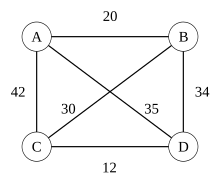

In [18]:
from itertools import permutations

**Function to calculate the total distance of a path:**

In [19]:
def calculate_total_distance(path, distance_matrix):
    total_distance = 0
    num_cities = len(path)
    for i in range(num_cities - 1):
        total_distance += distance_matrix[path[i]][path[i + 1]]
    total_distance += distance_matrix[path[-1]][path[0]]
    return total_distance


**Function to check whether all the cities were visited only once:**

In [20]:
def goal_test(path, num_cities):
    return len(path) == num_cities


**Function to check all the possible paths:**

In [21]:
def move_gen(distance_matrix):
    num_cities = len(distance_matrix)
    cities = range(num_cities)
    
    # find all possible paths
    possible_paths = permutations(cities)
    
    min_distance = float('inf')
    best_path = None
    
    for path in possible_paths:
        if goal_test(path, num_cities):
            current_distance = calculate_total_distance(path, distance_matrix)
            if current_distance < min_distance:
                min_distance = current_distance
                best_path = path
            
    return best_path, min_distance


**Function to print the solution path:**

In [22]:
def print_solution(best_path, min_distance):
    city_labels = ['A', 'B', 'C', 'D']
    print("Best Path:", [city_labels[city] for city in best_path])
    print("Minimum Distance:", min_distance)


In [23]:
distance_matrix = [[0, 20, 42, 35], 
                   [20, 0, 30, 34], 
                   [42, 30, 0, 12], 
                   [35, 34, 12, 0]]

In [24]:
best_path, min_distance = move_gen(distance_matrix)

In [25]:
print_solution(best_path, min_distance)

Best Path: ['A', 'B', 'C', 'D']
Minimum Distance: 97
